In [1]:
import numpy as np
import pandas as pd
import string
import spacy
nlp = spacy.load('en_core_web_md')

In [ ]:
import sys
!{sys.executable} -m spacy download en_core_web_md



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 45.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
afinn = pd.read_csv("/content/drive/My Drive/Python DS files/Data Science/Data Sets/Afinn.csv", sep = ',', encoding = 'latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
movie = pd.read_csv("/content/drive/My Drive/Python DS files/Data Science/Data Sets/movie.csv")
movie

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [ ]:
movie_df =

In [4]:
movie = [x.strip() for x in movie.text]
movie = [x for x in movie if x]
movie[0:10]

['I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.',
 "When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping 

In [23]:
text_movie = ' '.join(movie)
# text_movie

In [16]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(text_movie)
# sentences[0:10]

In [18]:
sent_df = pd.DataFrame(sentences, columns = ['sentence'])
sent_df

,sentence
0,I grew up (b.
1,1965) watching and loving the Thunderbirds.
2,All my mates at school watched.
3,"We played ""Thunderbirds"" before school, during..."
4,We all wanted to be Virgil or Scott.
...,...
423127,I don't even think the death scenes (3 to be e...
423128,"The soundtrack is the best with ""Heaven Is My ..."
423129,I have very great expectations about this and ...
423130,Read my comment.


In [19]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [20]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [21]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,I grew up (b.,0
1,1965) watching and loving the Thunderbirds.,3
2,All my mates at school watched.,0
3,"We played ""Thunderbirds"" before school, during...",0
4,We all wanted to be Virgil or Scott.,1
...,...,...
423127,I don't even think the death scenes (3 to be e...,-2
423128,"The soundtrack is the best with ""Heaven Is My ...",1
423129,I have very great expectations about this and ...,3
423130,Read my comment.,0


In [ ]:
sent_df[sent_df.sentiment_value<0]

,sentence,sentiment_value
8,How bitterly disappointing.,-4
12,Jonatha Frakes should hand in his directors ch...,-2
13,A waste of film.,-1
16,sapiens was a huge error of judgment.,-1
19,"But, to my disappointment, not any of this is ...",-2
...,...,...
422732,"My only crib is that there are no extras, not ...",-6
422737,This one had me weeping for about half an hour...,-1
422741,We expected reasonable well-written and well-a...,-2
422753,"He knows he's Michael, a cigar smoking, womani...",-3


In [ ]:
sent_df[sent_df.sentiment_value>0]

,sentence,sentiment_value
1,1965) watching and loving the Thunderbirds.,3
4,We all wanted to be Virgil or Scott.,1
7,I took my children to see the movie hoping the...,5
18,I was hoping that this movie would contain som...,11
23,"(With the exception of a few characters, like ...",2
...,...,...
422748,Kevin Bacon offers an excellent performance as...,3
422750,"And Oliver Platt, in another outstanding perfo...",5
422751,"Why would this film be so good, but only gross...",3
422756,"The soundtrack is the best with ""Heaven Is My ...",1


In [ ]:
sent_df['index'] = range(0, len(sent_df))
sent_df

,sentence,sentiment_value,index
0,I grew up (b.,0,0
1,1965) watching and loving the Thunderbirds.,3,1
2,All my mates at school watched.,0,2
3,"We played ""Thunderbirds"" before school, during...",0,3
4,We all wanted to be Virgil or Scott.,1,4
...,...,...,...
422755,I don't even think the death scenes (3 to be e...,-2,422755
422756,"The soundtrack is the best with ""Heaven Is My ...",1,422756
422757,I have very great expectations about this and ...,3,422757
422758,Read my comment.,0,422758


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

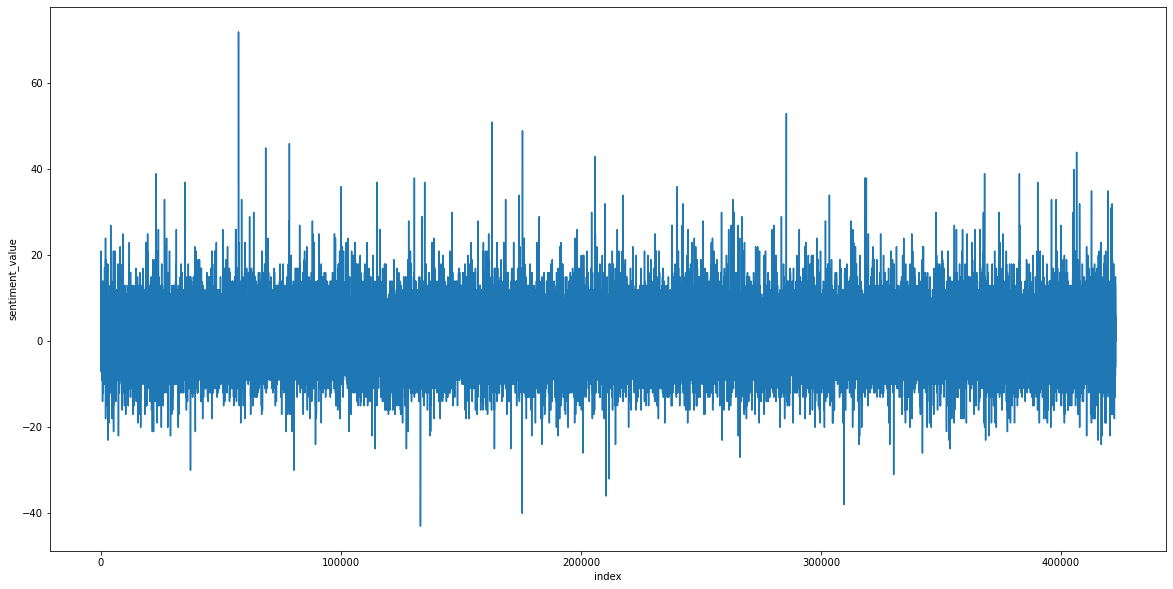

In [ ]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'sentiment_value', x = 'index', data = sent_df)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SUMA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sent_df['sentiment_value_vds'] = sent_df['sentence'].apply(vds.polarity_scores)
sent_df

,sentence,sentiment_value,index,sentiment_value_vds
0,I grew up (b.,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,1965) watching and loving the Thunderbirds.,3,1,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp..."
2,All my mates at school watched.,0,2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"We played ""Thunderbirds"" before school, during...",0,3,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp..."
4,We all wanted to be Virgil or Scott.,1,4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...
422755,I don't even think the death scenes (3 to be e...,-2,422755,"{'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'comp..."
422756,"The soundtrack is the best with ""Heaven Is My ...",1,422756,"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp..."
422757,I have very great expectations about this and ...,3,422757,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp..."
422758,Read my comment.,0,422758,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
sent_df.sort_values('sentiment_value').head()

,sentence,sentiment_value,index,sentiment_value_vds
133132,K Murli Mohan Rao made the much better BANDHAN...,-43,133132,"{'neg': 0.253, 'neu': 0.682, 'pos': 0.066, 'co..."
175558,"abhorrent, abominable, appalling, awful, beast...",-40,175558,"{'neg': 0.695, 'neu': 0.26, 'pos': 0.045, 'com..."
309716,<br /><br />Seagal is yet another agent/I'm a ...,-38,309716,"{'neg': 0.177, 'neu': 0.769, 'pos': 0.054, 'co..."
210525,teen killing - bad preteen sex - bad emotional...,-36,210525,"{'neg': 0.289, 'neu': 0.582, 'pos': 0.128, 'co..."
211650,This movie is stuffed full of stock Horror mov...,-32,211650,"{'neg': 0.349, 'neu': 0.627, 'pos': 0.024, 'co..."


In [ ]:
sent_df.sort_values('sentiment_value').tail()

,sentence,sentiment_value,index,sentiment_value_vds
78514,"Though there are some nifty sequences, nothing...",46,78514,"{'neg': 0.015, 'neu': 0.714, 'pos': 0.271, 'co..."
175652,this movie is such a good movie shah ruck khan...,49,175652,"{'neg': 0.061, 'neu': 0.643, 'pos': 0.296, 'co..."
162878,A great combination: - Chabat's humor - Uderzo...,51,162878,"{'neg': 0.009, 'neu': 0.59, 'pos': 0.4, 'compo..."
285608,"Yes, friends, I have a real problem with the l...",53,285608,"{'neg': 0.127, 'neu': 0.628, 'pos': 0.245, 'co..."
57322,Garofalo has all the enthusiasm and charm of a...,72,57322,"{'neg': 0.058, 'neu': 0.734, 'pos': 0.208, 'co..."


In [ ]:
words = tokenize.word_tokenize(text_movie)
words

['I',
 'grew',
 'up',
 '(',
 'b',
 '.',
 '1965',
 ')',
 'watching',
 'and',
 'loving',
 'the',
 'Thunderbirds',
 '.',
 'All',
 'my',
 'mates',
 'at',
 'school',
 'watched',
 '.',
 'We',
 'played',
 '``',
 'Thunderbirds',
 "''",
 'before',
 'school',
 ',',
 'during',
 'lunch',
 'and',
 'after',
 'school',
 '.',
 'We',
 'all',
 'wanted',
 'to',
 'be',
 'Virgil',
 'or',
 'Scott',
 '.',
 'No',
 'one',
 'wanted',
 'to',
 'be',
 'Alan',
 '.',
 'Counting',
 'down',
 'from',
 '5',
 'became',
 'an',
 'art',
 'form',
 '.',
 'I',
 'took',
 'my',
 'children',
 'to',
 'see',
 'the',
 'movie',
 'hoping',
 'they',
 'would',
 'get',
 'a',
 'glimpse',
 'of',
 'what',
 'I',
 'loved',
 'as',
 'a',
 'child',
 '.',
 'How',
 'bitterly',
 'disappointing',
 '.',
 'The',
 'only',
 'high',
 'point',
 'was',
 'the',
 'snappy',
 'theme',
 'tune',
 '.',
 'Not',
 'that',
 'it',
 'could',
 'compare',
 'with',
 'the',
 'original',
 'score',
 'of',
 'the',
 'Thunderbirds',
 '.',
 'Thankfully',
 'early',
 'Saturday',
 

In [ ]:
word_df = pd.DataFrame(words, columns = ['word'])
word_df

,word
0,I
1,grew
2,up
3,(
4,b
...,...
11187269,my
11187270,comment
11187271,.
11187272,Bye


In [ ]:
word_df['sentiment_value'] = word_df['word'].apply(calculate_sentiment)
word_df

In [ ]:
word_df_pos = word_df[word_df.sentiment_value>0]
word_df_pos

In [ ]:
word_df_pos.value_counts().head(10)

In [ ]:
word_df_neg = word_df[word_df.sentiment_value<0]
word_df_neg

In [ ]:
word_df_neg.value_counts().head(10)